In [4]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

cwd = os.getcwd()
df = pd.read_csv(cwd + "/data_csv/use_feature_data_embedded_2.csv")

In [5]:
df

,image,emotion,a_down_mouth,a_left_eye,a_left_mouth_nose,a_mouth_last_nose,a_right_mouth,a_right_mouth_nose,a_top_mouth,circum_mouth,d_left_eye,d_top_left_eye_eyebrow,w_mouth
0,facial-expressions_2868585k.jpg,7,-1.374634,0.748378,-1.221165,1.416401,-1.219605,-1.404011,0.925370,138.805306,32.140317,23.430749,73.109507
1,facial-expressions_2868582k.jpg,3,-0.703718,0.933726,-1.069192,1.045028,-0.535159,-1.264572,0.327478,138.313803,32.388269,22.671568,79.006329
2,Aaron_Guiel_0001.jpg,4,-1.035854,0.932477,-1.133770,1.234554,-0.802980,-1.375505,0.431313,168.892080,37.483330,25.000000,87.367042
3,Aaron_Peirsol_0001.jpg,4,-1.160100,0.698660,-0.851740,0.574845,-0.558536,-0.984691,-0.078387,146.661060,31.016125,21.189620,78.006410
4,Aaron_Peirsol_0002.jpg,4,-1.141533,0.947236,-0.933624,1.129617,-0.763686,-1.388161,0.279352,135.818093,34.234486,25.495098,72.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16996,SURPRISE/surprise (97).png,7,-1.080678,1.558602,-1.626860,1.908252,-1.082360,-1.312953,1.279416,101.436570,36.055513,36.878178,57.000000
16997,SURPRISE/surprise (970).png,7,-1.342400,0.970746,-1.253805,0.957605,-0.763834,-1.213408,0.209505,148.964336,34.525353,26.248809,78.102497
16998,SURPRISE/surprise (978).jpg,7,-1.467715,0.920926,-1.524588,1.633309,-1.249046,-1.644817,0.989714,109.363018,33.015148,32.388269,61.073726
16999,SURPRISE/surprise (984).jpg,7,-1.177028,1.181839,-1.574565,1.584830,-1.023379,-1.457029,0.938961,132.355723,37.121422,37.013511,75.000000


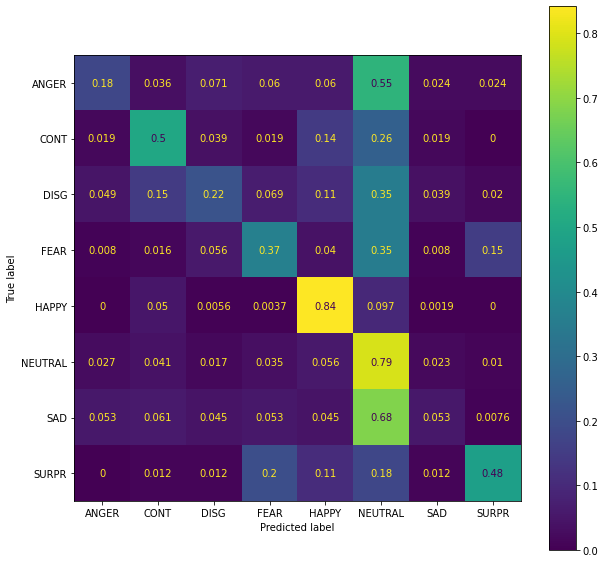

              precision    recall  f1-score   support

           0       0.34      0.18      0.23        84
           1       0.50      0.50      0.50       154
           2       0.37      0.22      0.27       102
           3       0.44      0.37      0.40       125
           4       0.84      0.84      0.84       538
           5       0.54      0.79      0.64       482
           6       0.23      0.05      0.09       132
           7       0.58      0.48      0.52        84

    accuracy                           0.61      1701
   macro avg       0.48      0.43      0.44      1701
weighted avg       0.58      0.61      0.58      1701



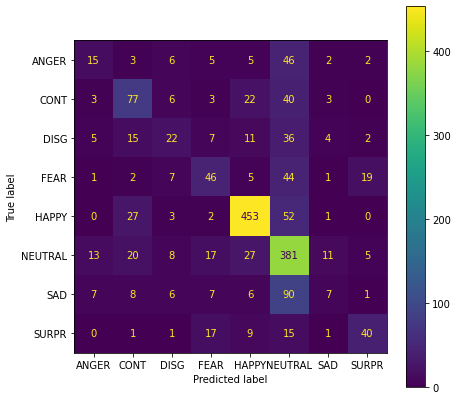

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# create model
clf = RandomForestClassifier(n_estimators=40)

dictionary = ['ANGER', 'CONT', 'DISG', 'FEAR', 'HAPPY',  'NEUTRAL', 'SAD', 'SURPR']

emo_feature = []
emo_target = []

count = 0
for i in range(len(df['emotion'])):
    emo_target.append(df['emotion'][i])    
    
    data = []
    for j in range(2, len(df.columns)):
        data.append(df._get_value(i, j, takeable = True))
    emo_feature.append(data)

emo_feature = np.array(emo_feature)
emo_target = np.array(emo_target)

# import data
X = emo_feature
y = emo_target

# add noisy features
random_state = np.random.RandomState(0)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random_state)

#fit model
clf.fit(X_train, y_train)
predict = clf.predict(X_test)

#plot matrix float
cm = confusion_matrix(y_test, predict, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dictionary)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.savefig('evaluate_matrix_embedded_2/rf_f.png',backend=None)
plt.show()
#plot matrix num
cm = confusion_matrix(y_test, predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dictionary)
fig, ax = plt.subplots(figsize=(7,7))
disp.plot(ax=ax)

print(classification_report(y_test, predict))

plt.savefig('evaluate_matrix_embedded_2/rf_n.png',backend=None)
plt.show()




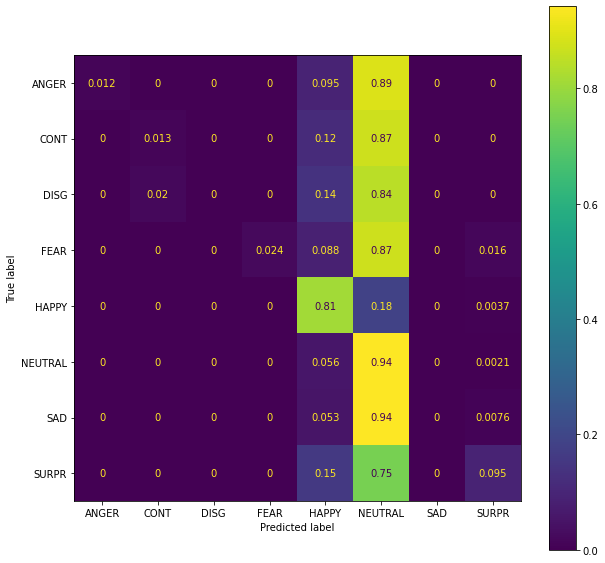

C:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

              precision    recall  f1-score   support

           0       1.00      0.01      0.02        84
           1       0.50      0.01      0.03       154
           2       0.00      0.00      0.00       102
           3       1.00      0.02      0.05       125
           4       0.82      0.81      0.81       538
           5       0.40      0.94      0.56       482
           6       0.00      0.00      0.00       132
           7       0.57      0.10      0.16        84

    accuracy                           0.53      1701
   macro avg       0.54      0.24      0.20      1701
weighted avg       0.57      0.53      0.43      1701



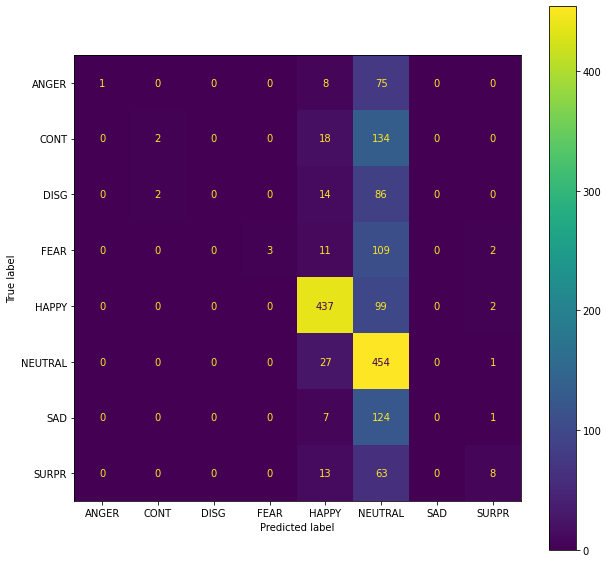

In [7]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


# create model
clf = svm.SVC(kernel='poly', C=1, probability=True)

dictionary = ['ANGER', 'CONT', 'DISG', 'FEAR', 'HAPPY',  'NEUTRAL', 'SAD', 'SURPR']

emo_feature = []
emo_target = []

count = 0
for i in range(len(df['emotion'])):
    emo_target.append(df['emotion'][i])    
    
    data = []
    for j in range(2, len(df.columns)):
        data.append(df._get_value(i, j, takeable = True))
    emo_feature.append(data)

emo_feature = np.array(emo_feature)
emo_target = np.array(emo_target)

# import data
X = emo_feature
y = emo_target

# add noisy features
random_state = np.random.RandomState(0)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random_state)

#fit model
clf.fit(X_train, y_train)
predict = clf.predict(X_test)

#plot matrix float
cm = confusion_matrix(y_test, predict, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dictionary)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.savefig('evaluate_matrix_embedded_2/poly_f.png',backend=None)
plt.show()

#plot matrix num
cm = confusion_matrix(y_test, predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dictionary)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)

TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

print(classification_report(y_test, predict))

plt.savefig('evaluate_matrix_embedded_2/poly_n.png',backend=None)
plt.show()

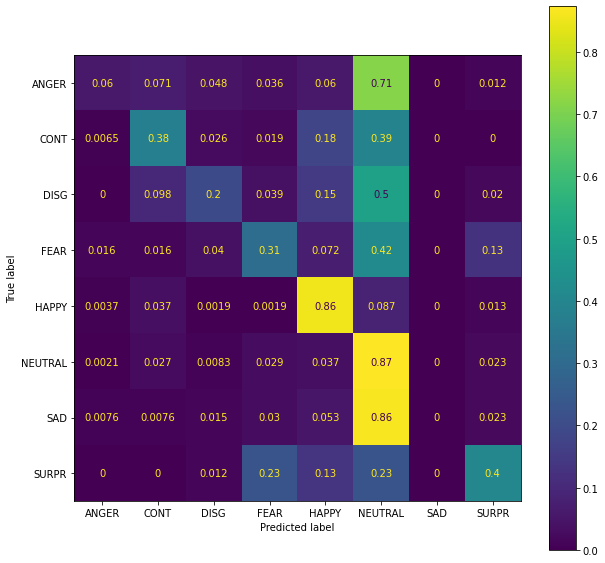

C:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

              precision    recall  f1-score   support

           0       0.42      0.06      0.10        84
           1       0.53      0.38      0.44       154
           2       0.49      0.20      0.28       102
           3       0.45      0.31      0.37       125
           4       0.83      0.86      0.84       538
           5       0.51      0.87      0.64       482
           6       0.00      0.00      0.00       132
           7       0.46      0.40      0.43        84

    accuracy                           0.61      1701
   macro avg       0.46      0.38      0.39      1701
weighted avg       0.56      0.61      0.56      1701



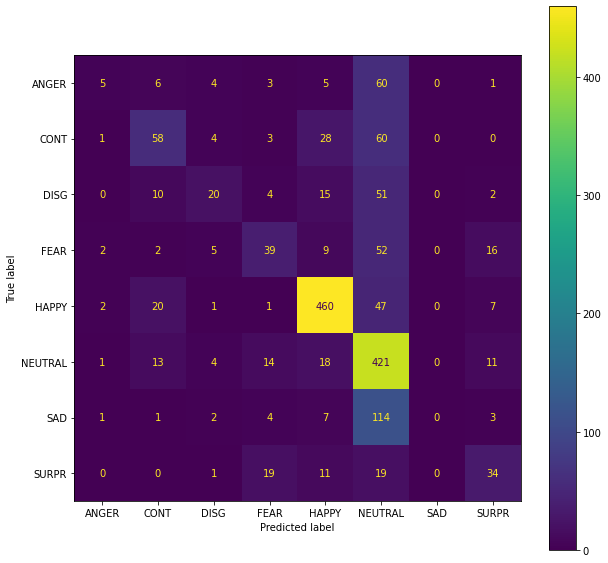

In [8]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


# create model
clf = svm.SVC(kernel='linear', C=1, probability=True)

dictionary = ['ANGER', 'CONT', 'DISG', 'FEAR', 'HAPPY',  'NEUTRAL', 'SAD', 'SURPR']

emo_feature = []
emo_target = []

count = 0
for i in range(len(df['emotion'])):
    emo_target.append(df['emotion'][i])
    
    data = []
    for j in range(2, len(df.columns)):
        data.append(df._get_value(i, j, takeable = True))
    emo_feature.append(data)

emo_feature = np.array(emo_feature)
emo_target = np.array(emo_target)

# import data
X = emo_feature
y = emo_target

# add noisy features
random_state = np.random.RandomState(0)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random_state)

#fit model
clf.fit(X_train, y_train)
predict = clf.predict(X_test)

#plot matrix float
cm = confusion_matrix(y_test, predict, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dictionary)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.savefig('evaluate_matrix_embedded_2/linear_f.png',backend=None)
plt.show()

#plot matrix num
cm = confusion_matrix(y_test, predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dictionary)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)

print(classification_report(y_test, predict))


plt.savefig('evaluate_matrix_embedded_2/linear_n.png',backend=None)
plt.show()

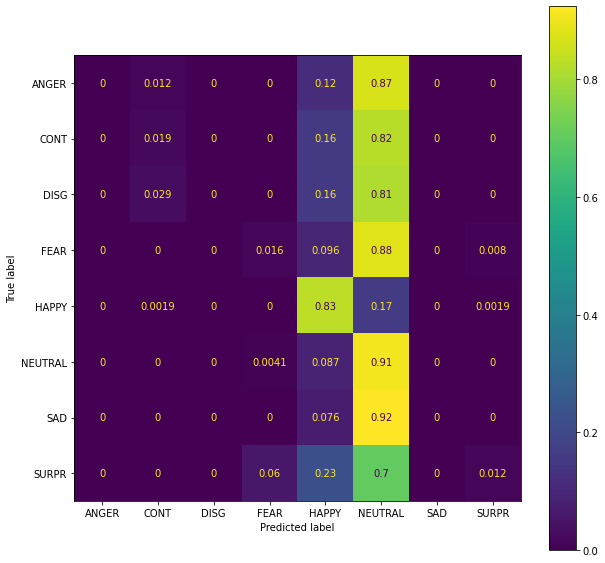

C:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        84
           1       0.38      0.02      0.04       154
           2       0.00      0.00      0.00       102
           3       0.22      0.02      0.03       125
           4       0.77      0.83      0.80       538
           5       0.40      0.91      0.55       482
           6       0.00      0.00      0.00       132
           7       0.33      0.01      0.02        84

    accuracy                           0.52      1701
   macro avg       0.26      0.22      0.18      1701
weighted avg       0.42      0.52      0.42      1701



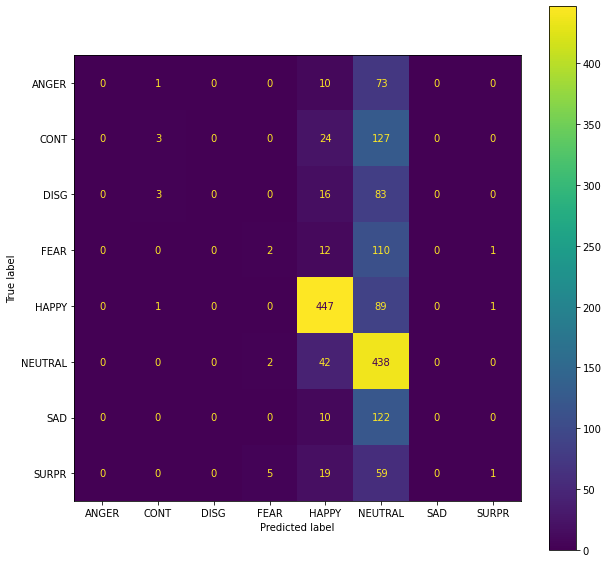

In [9]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


# create model
clf = svm.SVC(kernel='rbf', C=1, probability=True)

dictionary = ['ANGER', 'CONT', 'DISG', 'FEAR', 'HAPPY',  'NEUTRAL', 'SAD', 'SURPR']

emo_feature = []
emo_target = []

count = 0
for i in range(len(df['emotion'])):
    emo_target.append(df['emotion'][i])    
    
    data = []
    for j in range(2, len(df.columns)):
        data.append(df._get_value(i, j, takeable = True))
    emo_feature.append(data)

emo_feature = np.array(emo_feature)
emo_target = np.array(emo_target)

# import data
X = emo_feature
y = emo_target

# add noisy features
random_state = np.random.RandomState(0)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random_state)

#fit model
clf.fit(X_train, y_train)
predict = clf.predict(X_test)

#plot matrix float
cm = confusion_matrix(y_test, predict, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dictionary)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.savefig('evaluate_matrix_embedded_2/rbf_f.png',backend=None)
plt.show()

#plot matrix num
cm = confusion_matrix(y_test, predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dictionary)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)

print(classification_report(y_test, predict))

plt.savefig('evaluate_matrix_embedded_2/rbf_n.png',backend=None)
plt.show()

C:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


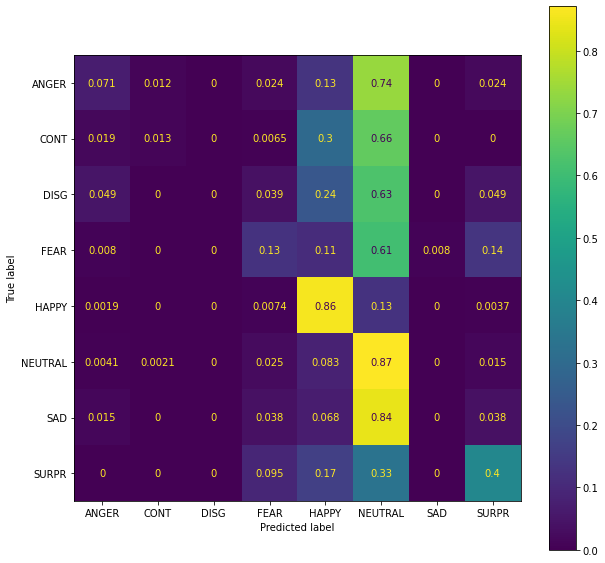

C:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

              precision    recall  f1-score   support

           0       0.30      0.07      0.12        84
           1       0.50      0.01      0.03       154
           2       0.00      0.00      0.00       102
           3       0.31      0.13      0.18       125
           4       0.75      0.86      0.80       538
           5       0.45      0.87      0.59       482
           6       0.00      0.00      0.00       132
           7       0.47      0.40      0.44        84

    accuracy                           0.55      1701
   macro avg       0.35      0.29      0.27      1701
weighted avg       0.47      0.55      0.46      1701



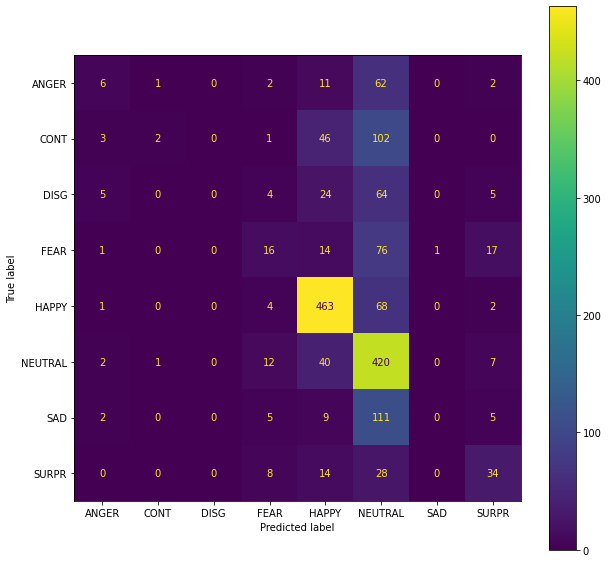

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


# create model
clf = LogisticRegression()

dictionary = ['ANGER', 'CONT', 'DISG', 'FEAR', 'HAPPY',  'NEUTRAL', 'SAD', 'SURPR']

emo_feature = []
emo_target = []

count = 0
for i in range(len(df['emotion'])):
    emo_target.append(df['emotion'][i])    
    
    data = []
    for j in range(2, len(df.columns)):
        data.append(df._get_value(i, j, takeable = True))
    emo_feature.append(data)

emo_feature = np.array(emo_feature)
emo_target = np.array(emo_target)

# import data
X = emo_feature
y = emo_target

# add noisy features
random_state = np.random.RandomState(0)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random_state)

#fit model
clf.fit(X_train, y_train)
predict = clf.predict(X_test)

#plot matrix float
cm = confusion_matrix(y_test, predict, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dictionary)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.savefig('evaluate_matrix_embedded_2/lr_f.png',backend=None)
plt.show()

#plot matrix num
cm = confusion_matrix(y_test, predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dictionary)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)

print(classification_report(y_test, predict))

plt.savefig('evaluate_matrix_embedded_2/lr_n.png',backend=None)
plt.show()

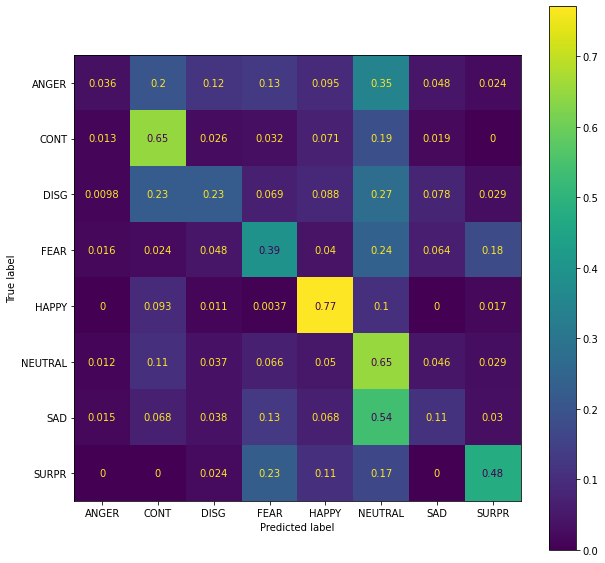

              precision    recall  f1-score   support

           0       0.19      0.04      0.06        84
           1       0.40      0.65      0.49       154
           2       0.31      0.23      0.26       102
           3       0.35      0.39      0.37       125
           4       0.85      0.77      0.81       538
           5       0.55      0.65      0.60       482
           6       0.25      0.11      0.16       132
           7       0.43      0.48      0.45        84

    accuracy                           0.56      1701
   macro avg       0.41      0.41      0.40      1701
weighted avg       0.55      0.56      0.55      1701



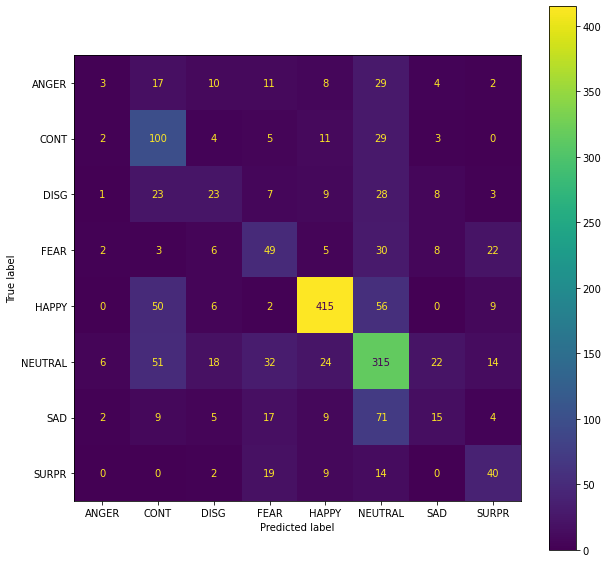

In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


# create model
clf = GaussianNB()

dictionary = ['ANGER', 'CONT', 'DISG', 'FEAR', 'HAPPY',  'NEUTRAL', 'SAD', 'SURPR']

emo_feature = []
emo_target = []

count = 0
for i in range(len(df['emotion'])):
    emo_target.append(df['emotion'][i])    
    
    data = []
    for j in range(2, len(df.columns)):
        data.append(df._get_value(i, j, takeable = True))
    emo_feature.append(data)

emo_feature = np.array(emo_feature)
emo_target = np.array(emo_target)

# import data
X = emo_feature
y = emo_target

# add noisy features
random_state = np.random.RandomState(0)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random_state)

#fit model
clf.fit(X_train, y_train)
predict = clf.predict(X_test)

#plot matrix float
cm = confusion_matrix(y_test, predict, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dictionary)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.savefig('evaluate_matrix_embedded_2/gnb_f.png',backend=None)
plt.show()

#plot matrix num
cm = confusion_matrix(y_test, predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dictionary)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)

print(classification_report(y_test, predict))

plt.savefig('evaluate_matrix_embedded_2/gnb_n.png',backend=None)
plt.show()